# Polynomial Regression with Multiple Features

**Linear regression** models are made up of linear combinations of inputs and weights:

$h_\theta = \theta_0 + \theta_1X_1 + \theta_2X_2 + \theta_3X_3 ... \theta_nX_n$

LaTeX generator: https://www.codecogs.com/latex/eqneditor.php


**Polynomial regression** models inputs and weights as well, but allows for those weights to be raised to varying degrees:
$h_\theta = \theta_0 + \theta_1X_1 + \theta_1X_1^2 + \theta_2X_2 + \theta_2X_2^2 + \theta_2X_2^3+ \theta_3X_3 ... \theta_nX_n^p$

Polynomial regression allows us to fit **nonlinear trends**.



Let's grab some data and try both types of regression. For the sake of visualization, we are using only one input feature, X.


### Illustrating the limitations of simple linear regression

In [46]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 600, n_features = 1, noise = 8, bias = 2)
y2 = y**2

Make our training and testing data sets:

In [50]:
import numpy as np
import random
numTrain = 400
my_randoms = random.sample(range(599), numTrain)
X_train = X[my_randoms]
y2_train = y2[my_randoms]

X_test = [x for i,x in enumerate(X) if i!=0]
y2_test = [x for i,x in enumerate(y2) if i!=0]


In [51]:
a = [1,2,3]
[x for i,x in enumerate(a) if i!=0]

[2, 3]

Then we can plot the data below:

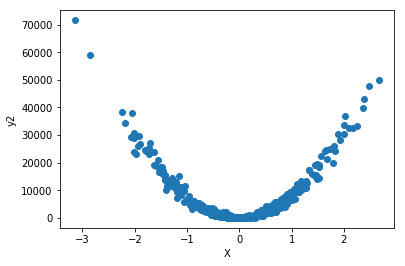

In [52]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y2_train)
plt.xlabel('X')
plt.ylabel('y2')
plt.show()

We can see from the plot above, that a simple linear regression won't fit very well to the parabola-shaped scatter pattern.


Let's try fit a straight line to it anyway:

In [65]:
from sklearn import linear_model
model = LinearRegression()
model.fit(X_train,y2_train)

print('Intercept: ', model.intercept_)
print('Coefficient: ', model.coef_[0])

Intercept:  6936.563135972192
Coefficient:  -44.96087330490145


Our resultant model is:

### $h_\theta = 6936.56 -44.96_1X_1$

Let's: 

1. Generate predictions from the testing set
2. Plot the predictions
3. Get the R2


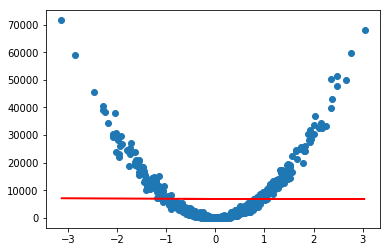

In [62]:
# Generate predictions using our model
predictions = model.predict(X_test)
plt.scatter(X_test,y2_test)
plt.plot(X_test, predictions, color='red')
plt.show()

In [68]:
# That does not look like a good fit, lets confirm this with the R2
from sklearn import metrics as mt
mt.r2_score(y2_test, predictions)

-0.0014233002467989309

### Overcoming limitations using polynomial regression

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 3) # i.e. X + X^2 + X^3
X_poly = poly_features.fit_transform(X_train)

**X_poly** formats splits our input features into 3 features based on the :

1. The original X value
2. X^2
3. X^3

There is an added '1' value for every item to represent to act as the intercept weight/bias.

This is simply the format that the **.fit()** method needs to create a prediction model.

In [86]:
print(X_poly)

[[ 1.         -0.48770746  0.23785857 -0.1160054 ]
 [ 1.          2.25203721  5.07167158 11.4215931 ]
 [ 1.         -0.45688044  0.20873974 -0.0953691 ]
 ...
 [ 1.          0.26511651  0.07028676  0.01863418]
 [ 1.         -0.23821624  0.05674698 -0.01351805]
 [ 1.         -1.55622165  2.42182581 -3.76889774]]


In [84]:
print(X_train[0:3])

[[-0.48770746]
 [ 2.25203721]
 [-0.45688044]]
0.2378585665396516
-0.11600539732629446


In [87]:
print(-0.48770746 * -0.48770746 ) # X^2

print(-0.48770746 * -0.48770746 * -0.48770746 ) #X^3

0.2378585665396516
-0.11600539732629446


Let's fit the regression model:

In [89]:
poly_model = LinearRegression().fit(X_poly, y2_train)

In [91]:
print('Intercept: ', poly_model.intercept_)
print('Coeficients: ', poly_model.coef_)

Intercept:  223.4067787715012
Coeficients:  [   0.          406.12573495 7439.18744984  -38.15769213]


Our resultant model is:


### $h_\theta = 223.41 + 406.13X_1 + 7439.19X_1^2 - 38.16X_1^3 $

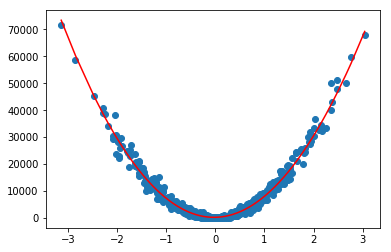

In [95]:
# Generate predictions using our model
poly_predictions = poly_model.predict(poly_features.fit_transform(X_test))
new_X, new_y = zip(*sorted(zip(X_test, poly_predictions))) # sort values for plotting
plt.scatter(X_test,y2_test)
plt.plot(new_X, new_y, color='red')
plt.show()

### Multiple Polynomial Regression

While harder to visualize, the true power in polynomial regression lies in its application in multiple regression.

The following example uses many features to predict the output:

In [113]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 600, n_features = 10, noise = 8, bias = 2)
y2 = y**2

In [114]:
X

array([[ 0.55607372,  0.78376465,  0.73051059, ..., -0.73762937,
         1.24893899,  0.56490285],
       [ 0.80064903, -1.86263085, -0.88100173, ..., -2.41761918,
        -0.6558456 ,  1.72657346],
       [-0.80744852,  0.48188764,  0.48086237, ..., -1.40075517,
         0.33651783,  2.94884365],
       ...,
       [ 0.78927808, -1.33359662, -2.14379488, ..., -0.03219093,
         2.1099757 , -0.25097664],
       [-0.1028731 , -0.37153368,  1.54137626, ..., -0.80111598,
        -0.35469256, -0.97870545],
       [-1.06603375, -1.17834085, -1.58275906, ..., -0.03351773,
         1.25082517, -0.67739534]])